In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np

In [3]:
stocks = pd.read_csv('stocks_clean/AAPL.csv', parse_dates=['date_'])

In [4]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10569 entries, 0 to 10568
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date_   10569 non-null  datetime64[ns]
 1   ticker  10569 non-null  object        
 2   open    10569 non-null  float64       
 3   high    10569 non-null  float64       
 4   low     10569 non-null  float64       
 5   close   10569 non-null  float64       
 6   vol     10569 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 578.1+ KB


In [5]:
stocks.head()

,date_,ticker,open,high,low,close,vol
0,2015-01-02 17:00:00,AAPL,111.390,111.44,108.650,109.5000,9886884
1,2015-01-02 18:00:00,AAPL,109.490,109.71,107.350,108.2850,12628997
2,2015-01-02 19:00:00,AAPL,108.290,108.79,107.850,108.7761,6291776
3,2015-01-02 20:00:00,AAPL,108.770,109.59,108.755,109.3550,5049924
4,2015-01-02 21:00:00,AAPL,109.355,109.47,108.750,108.9900,3663606


In [6]:
sample = stocks[:900].copy()

In [7]:
sample.head(10)

,date_,ticker,open,high,low,close,vol
0,2015-01-02 17:00:00,AAPL,111.390,111.440,108.650,109.5000,9886884
1,2015-01-02 18:00:00,AAPL,109.490,109.710,107.350,108.2850,12628997
2,2015-01-02 19:00:00,AAPL,108.290,108.790,107.850,108.7761,6291776
3,2015-01-02 20:00:00,AAPL,108.770,109.590,108.755,109.3550,5049924
4,2015-01-02 21:00:00,AAPL,109.355,109.470,108.750,108.9900,3663606
5,2015-01-02 22:00:00,AAPL,108.995,109.380,108.900,109.0800,3071880
6,2015-01-02 23:00:00,AAPL,109.080,109.524,108.690,109.3000,6452430
7,2015-01-05 17:00:00,AAPL,108.290,108.650,107.410,107.5746,7957798
8,2015-01-05 18:00:00,AAPL,107.570,108.190,107.330,107.4200,7674767
9,2015-01-05 19:00:00,AAPL,107.425,107.530,106.550,106.8733,8600950


In [8]:
def plot_timeseries(data_set, vals, period='1M'):
    date_range = pd.date_range(start=data_set.iloc[:, 0].min(), end=data_set.iloc[:, 0].max(), freq=period)
    with plt.style.context('seaborn-notebook'):
        fig, ax = plt.subplots()
        
        plt.plot(data_set.columns[0], f'{vals}', data=data_set)
        ax.set_xlabel("Date")
        ax.xaxis.set_major_formatter(DateFormatter(f'%Y-%m'))
        plt.xticks(date_range)

In [9]:
def exp_smoothing(series, alpha=0.05):
    smoothed = [series[0]]
    for i in range(1, len(series)):
        smoothed.append(alpha*series[i] + (1-alpha) * series[i-1])
    return smoothed

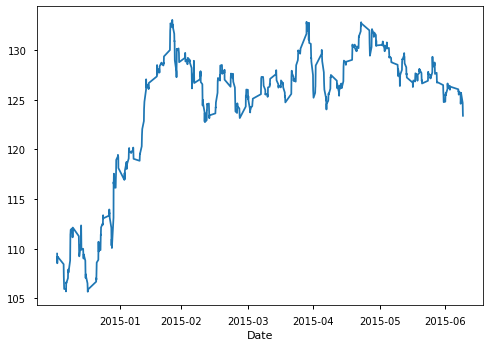

In [10]:
sample['test'] = exp_smoothing(sample.close, 0.5)
plot_timeseries(sample, 'test')

In [11]:
sample.test.head()

0    109.50000
1    108.89250
2    108.53055
3    109.06555
4    109.17250
Name: test, dtype: float64

CPU times: total: 31.2 ms
Wall time: 57 ms


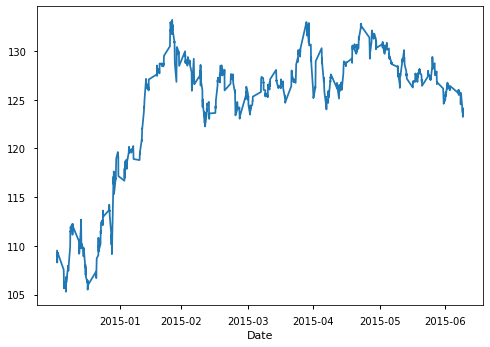

In [12]:
%%time
plot_timeseries(sample, 'close', '1M')


In [13]:
sample.head()

,date_,ticker,open,high,low,close,vol,test
0,2015-01-02 17:00:00,AAPL,111.390,111.44,108.650,109.5000,9886884,109.50000
1,2015-01-02 18:00:00,AAPL,109.490,109.71,107.350,108.2850,12628997,108.89250
2,2015-01-02 19:00:00,AAPL,108.290,108.79,107.850,108.7761,6291776,108.53055
3,2015-01-02 20:00:00,AAPL,108.770,109.59,108.755,109.3550,5049924,109.06555
4,2015-01-02 21:00:00,AAPL,109.355,109.47,108.750,108.9900,3663606,109.17250


### ARIMA

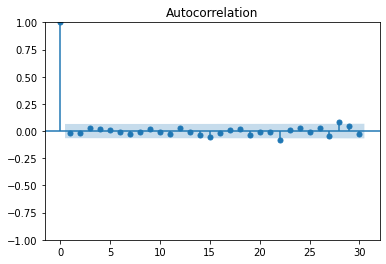

In [23]:
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(sample['open'].diff(1).dropna())

plt.show()